In [313]:
import io
import os
import matplotlib.pyplot as plt
import pandas as pd

In [314]:
df = pd.read_csv('ETLSINASC.DNRES_SP_2015_t.csv')

In [315]:
df.head()

,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,...,dia_semana_nasc,ano_nasc,parto_prematuro,def_parto_prematuro,codanomal_capitulo,codanomal_grupo,codanomal_categoria,codanomal_subcategoria,nasc_coordenadas,res_coordenadas
0,1,3,9999998.0,354870,1,41,9,9,NaN,NaN,...,qui,2015,0.0,Termo,NaN,NaN,NaN,NaN,"-23.694,-46.565","-23.694,-46.565"
1,2,1,NaN,355620,3,34,2,9,214505.0,1.0,...,dom,2015,0.0,Termo,NaN,NaN,NaN,NaN,"-22.971,-46.996","-22.971,-46.996"
2,3,1,NaN,350750,3,23,2,5,999992.0,0.0,...,qua,2015,0.0,Termo,NaN,NaN,NaN,NaN,"-22.886,-48.445","-22.886,-48.445"
3,4,1,NaN,355220,3,24,1,9,998999.0,0.0,...,dom,2015,0.0,Termo,NaN,NaN,NaN,NaN,"-23.502,-47.458","-23.502,-47.458"
4,5,1,NaN,355220,3,25,1,5,231205.0,0.0,...,ter,2015,2.0,Inconclusivo-Peso,NaN,NaN,NaN,NaN,"-23.502,-47.458","-23.502,-47.458"


In [316]:
df.shape

(634026, 120)

In [317]:
columns_to_include = [
    #'CODMUNNASC',
    #'LOCNASC',
    'IDADEMAE',
    'ESTCIVMAE',
    'QTDFILVIVO',
    'QTDFILMORT',
   # 'CODMUNRES',
    #'GRAVIDEZ',
    'PARTO',
    'CONSULTAS',
    'SEXO',
    'RACACOR',
    'IDANOMAL',
    'RACACORMAE',
    'QTDGESTANT',
    'QTDPARTNOR',
    'CONSPRENAT',
    'MESPRENAT',
    'TPNASCASSI',
    'ESCMAE',
    #'GESTACAO',
    'SEMAGESTAC',
    'QTDPARTCES'
]               


In [318]:
df2 = df[columns_to_include]

In [319]:
df2.head()

,IDADEMAE,ESTCIVMAE,QTDFILVIVO,QTDFILMORT,PARTO,CONSULTAS,SEXO,RACACOR,IDANOMAL,RACACORMAE,QTDGESTANT,QTDPARTNOR,CONSPRENAT,MESPRENAT,TPNASCASSI,ESCMAE,SEMAGESTAC,QTDPARTCES
0,41,9,NaN,NaN,9,9,1,9,9,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,34,2,1.0,0.0,1,4,2,9,2,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
2,23,2,0.0,0.0,1,4,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN
3,24,1,0.0,0.0,1,9,1,9,2,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
4,25,1,0.0,0.0,1,4,1,9,2,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN


In [320]:
df2.isnull().sum()

IDADEMAE          0
ESTCIVMAE         0
QTDFILVIVO    11036
QTDFILMORT    17483
PARTO             0
CONSULTAS         0
SEXO              0
RACACOR           0
IDANOMAL          0
RACACORMAE    11424
QTDGESTANT    14183
QTDPARTNOR    20372
CONSPRENAT     9994
MESPRENAT     12993
TPNASCASSI     6168
ESCMAE            0
SEMAGESTAC     3727
QTDPARTCES    19094
dtype: int64

In [321]:
df2.dropna(axis= 0, inplace=True)

C:\Users\Sadeeq\AppData\Local\Temp\ipykernel_119976\1144994124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(axis= 0, inplace=True)


In [322]:
df2.isnull().sum()

IDADEMAE      0
ESTCIVMAE     0
QTDFILVIVO    0
QTDFILMORT    0
PARTO         0
CONSULTAS     0
SEXO          0
RACACOR       0
IDANOMAL      0
RACACORMAE    0
QTDGESTANT    0
QTDPARTNOR    0
CONSPRENAT    0
MESPRENAT     0
TPNASCASSI    0
ESCMAE        0
SEMAGESTAC    0
QTDPARTCES    0
dtype: int64

In [323]:
df2.shape

(592263, 18)

In [324]:
df2['IDADEMAE'].value_counts()

29    29905
27    29863
28    29470
26    29462
30    28785
32    28376
31    28302
25    27795
22    27084
21    26953
24    26945
33    26842
23    26676
20    26585
19    24266
34    23782
35    21379
18    19817
36    18103
17    16268
37    14842
38    11998
16    11303
39     9162
40     6968
15     6622
41     4715
42     3135
14     2419
43     1821
44     1024
45      532
13      470
46      247
47      129
48       58
12       43
49       42
50       30
51       15
52        6
53        5
54        5
11        5
56        4
62        2
99        1
58        1
64        1
Name: IDADEMAE, dtype: int64

In [325]:
df2['SEMAGESTAC'].value_counts()

39.0    176216
38.0    139975
40.0    112323
37.0     58429
41.0     32744
36.0     25057
35.0     13301
34.0      8250
42.0      6155
33.0      5007
32.0      3296
31.0      1895
43.0      1657
30.0      1619
29.0      1076
28.0      1041
27.0       793
44.0       762
26.0       621
25.0       502
24.0       415
45.0       403
23.0       311
22.0       204
21.0       109
20.0        58
19.0        44
Name: SEMAGESTAC, dtype: int64

In [326]:
def idamae(x):
    if x < 37:
        return 'Premature'
    else:
        return 'Normal'

In [327]:
df2['new_outcome'] = df2['SEMAGESTAC'].apply(idamae)

C:\Users\Sadeeq\AppData\Local\Temp\ipykernel_119976\1631273925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['new_outcome'] = df2['SEMAGESTAC'].apply(idamae)


In [328]:
df2['new_outcome'].value_counts()

Normal       528664
Premature     63599
Name: new_outcome, dtype: int64

In [329]:
unknown_keys = [
    ('ESTCIVMAE', 9),
    ('QTDFILVIVO', 99),
    ('QTDFILMORT', 99),
    #('GRAVIDEZ', 9),
    ('PARTO', 9),
    ('CONSULTAS', 9),
    ('SEXO', 0),
    ('RACACOR', 9),
    ('IDANOMAL', 9),
    ('MESPRENAT', 99),
    ('TPNASCASSI', 9),
    ('ESCMAE', 9),
    #('GESTACAO', 9),
]
 

In [330]:
for var_name,var_val in unknown_keys:
  df2[var_name] = df2[var_name].replace(var_val, None)

C:\Users\Sadeeq\AppData\Local\Temp\ipykernel_119976\1453195520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[var_name] = df2[var_name].replace(var_val, None)


In [331]:
df2.isnull().sum()

IDADEMAE           0
ESTCIVMAE       1776
QTDFILVIVO         0
QTDFILMORT         0
PARTO            166
CONSULTAS       2534
SEXO              92
RACACOR            0
IDANOMAL        3977
RACACORMAE         0
QTDGESTANT         0
QTDPARTNOR         0
CONSPRENAT         0
MESPRENAT      15363
TPNASCASSI       318
ESCMAE          1949
SEMAGESTAC         0
QTDPARTCES         0
new_outcome        0
dtype: int64

In [332]:
df2.dropna(axis= 0, inplace=True)

C:\Users\Sadeeq\AppData\Local\Temp\ipykernel_119976\1144994124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(axis= 0, inplace=True)


In [333]:
df2.isnull().sum()

IDADEMAE       0
ESTCIVMAE      0
QTDFILVIVO     0
QTDFILMORT     0
PARTO          0
CONSULTAS      0
SEXO           0
RACACOR        0
IDANOMAL       0
RACACORMAE     0
QTDGESTANT     0
QTDPARTNOR     0
CONSPRENAT     0
MESPRENAT      0
TPNASCASSI     0
ESCMAE         0
SEMAGESTAC     0
QTDPARTCES     0
new_outcome    0
dtype: int64

In [334]:
df2.head()

,IDADEMAE,ESTCIVMAE,QTDFILVIVO,QTDFILMORT,PARTO,CONSULTAS,SEXO,RACACOR,IDANOMAL,RACACORMAE,QTDGESTANT,QTDPARTNOR,CONSPRENAT,MESPRENAT,TPNASCASSI,ESCMAE,SEMAGESTAC,QTDPARTCES,new_outcome
60,29,2,1.0,0.0,1,4,2,4,2,4.0,1.0,1.0,14.0,1.0,4.0,5,36.0,0.0,Premature
61,22,1,4.0,2.0,1,4,2,4,2,4.0,6.0,4.0,8.0,1.0,1.0,3,38.0,0.0,Normal
63,19,1,1.0,0.0,1,4,2,4,2,4.0,1.0,1.0,8.0,2.0,1.0,3,39.0,0.0,Normal
66,33,2,1.0,1.0,2,4,2,1,2,1.0,2.0,0.0,8.0,2.0,1.0,3,38.0,1.0,Normal
70,22,2,0.0,0.0,2,4,1,4,2,4.0,0.0,0.0,13.0,5.0,1.0,4,40.0,0.0,Normal


In [335]:
df2.shape

(568895, 19)

In [336]:
import seaborn as sns

<AxesSubplot:>

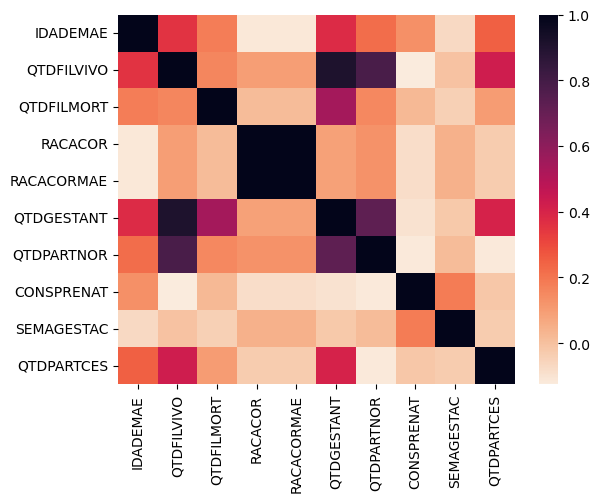

In [337]:
sns.heatmap(df2.corr(), cmap='rocket_r')

In [338]:
df2.drop('QTDFILVIVO', axis=1, inplace=True)

C:\Users\Sadeeq\AppData\Local\Temp\ipykernel_119976\2745943941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('QTDFILVIVO', axis=1, inplace=True)


<AxesSubplot:>

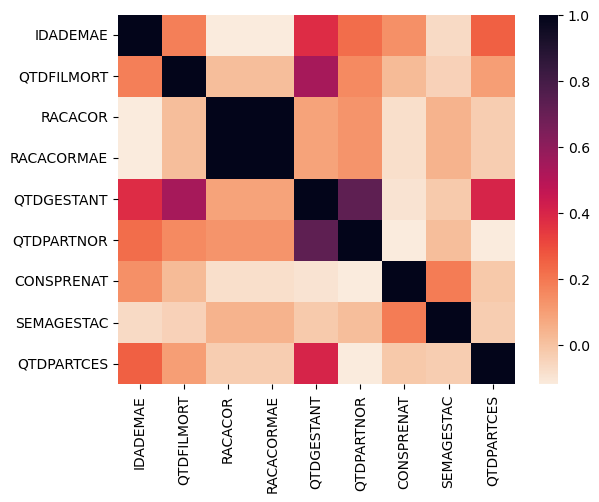

In [339]:
sns.heatmap(df2.corr(), cmap='rocket_r')

In [340]:
df2.drop('RACACOR', axis=1, inplace=True)

C:\Users\Sadeeq\AppData\Local\Temp\ipykernel_119976\2410930310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('RACACOR', axis=1, inplace=True)


<AxesSubplot:>

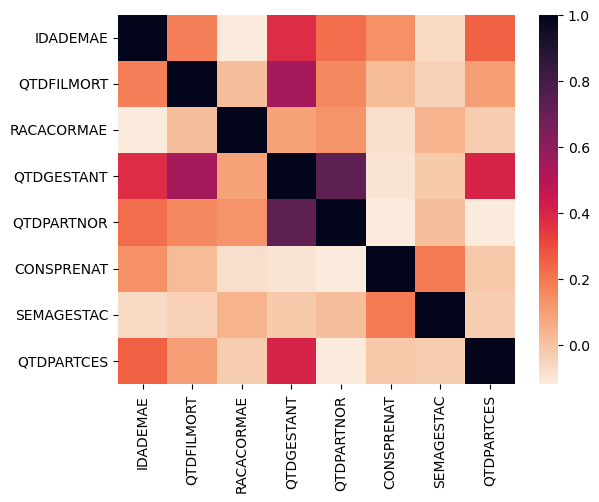

In [341]:
sns.heatmap(df2.corr(), cmap='rocket_r')

In [342]:
df2.drop('SEMAGESTAC', axis=1, inplace=True)

C:\Users\Sadeeq\AppData\Local\Temp\ipykernel_119976\330429576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('SEMAGESTAC', axis=1, inplace=True)


<AxesSubplot:>

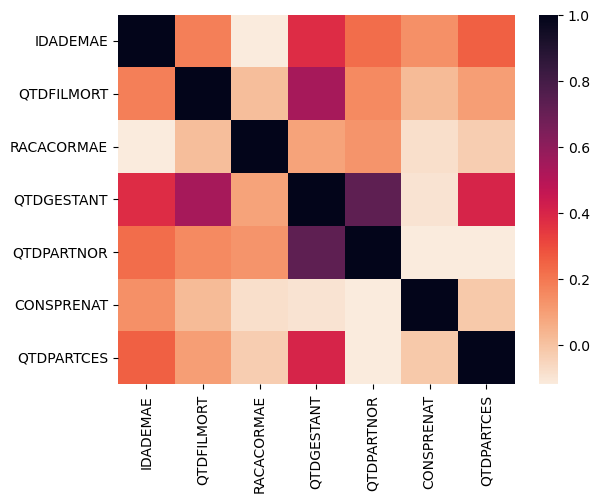

In [343]:
sns.heatmap(df2.corr(), cmap='rocket_r')

In [344]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568895 entries, 60 to 634025
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   IDADEMAE     568895 non-null  int64  
 1   ESTCIVMAE    568895 non-null  object 
 2   QTDFILMORT   568895 non-null  float64
 3   PARTO        568895 non-null  object 
 4   CONSULTAS    568895 non-null  object 
 5   SEXO         568895 non-null  object 
 6   IDANOMAL     568895 non-null  object 
 7   RACACORMAE   568895 non-null  float64
 8   QTDGESTANT   568895 non-null  float64
 9   QTDPARTNOR   568895 non-null  float64
 10  CONSPRENAT   568895 non-null  float64
 11  MESPRENAT    568895 non-null  object 
 12  TPNASCASSI   568895 non-null  object 
 13  ESCMAE       568895 non-null  object 
 14  QTDPARTCES   568895 non-null  float64
 15  new_outcome  568895 non-null  object 
dtypes: float64(6), int64(1), object(9)
memory usage: 73.8+ MB


In [345]:
def qtg(x):
    if x==0:
        return 'QTDGESTANT_0'
    elif x> 0 and x<3:
        return 'QTDGESTANT_1-2'
    elif x>= 3 and x<=6: 
        return 'QTDGESTANT_3-6'
    else:
        return 'QTDGESTANT_>=7'

In [346]:
df2['QTDGESTANT_Second'] = df['QTDGESTANT'].apply(qtg)
df2.drop('QTDGESTANT',axis=1,  inplace=True)

C:\Users\Sadeeq\AppData\Local\Temp\ipykernel_119976\743164211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['QTDGESTANT_Second'] = df['QTDGESTANT'].apply(qtg)
C:\Users\Sadeeq\AppData\Local\Temp\ipykernel_119976\743164211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('QTDGESTANT',axis=1,  inplace=True)


In [347]:
df2['QTDGESTANT_Second'].value_counts()

QTDGESTANT_1-2    261665
QTDGESTANT_0      240256
QTDGESTANT_3-6     64000
QTDGESTANT_>=7      2974
Name: QTDGESTANT_Second, dtype: int64

In [348]:
def qtd(x):
    if x==0:
        return 'QTDPARTNOR_0'
    elif x> 0 and x<3:
        return 'QTDPARTNOR_1-2'
    elif x>= 3 and x<=6: 
        return 'QTDPARTNOR_3-6'
    else:
        return 'QTDPARTNOR_>=7'

In [349]:
df2['QTDPARTNOR_Second'] = df['QTDPARTNOR'].apply(qtd)
df2.drop('QTDPARTNOR',axis=1,  inplace=True)

C:\Users\Sadeeq\AppData\Local\Temp\ipykernel_119976\323900840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['QTDPARTNOR_Second'] = df['QTDPARTNOR'].apply(qtd)
C:\Users\Sadeeq\AppData\Local\Temp\ipykernel_119976\323900840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('QTDPARTNOR',axis=1,  inplace=True)


In [350]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568895 entries, 60 to 634025
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   IDADEMAE           568895 non-null  int64  
 1   ESTCIVMAE          568895 non-null  object 
 2   QTDFILMORT         568895 non-null  float64
 3   PARTO              568895 non-null  object 
 4   CONSULTAS          568895 non-null  object 
 5   SEXO               568895 non-null  object 
 6   IDANOMAL           568895 non-null  object 
 7   RACACORMAE         568895 non-null  float64
 8   CONSPRENAT         568895 non-null  float64
 9   MESPRENAT          568895 non-null  object 
 10  TPNASCASSI         568895 non-null  object 
 11  ESCMAE             568895 non-null  object 
 12  QTDPARTCES         568895 non-null  float64
 13  new_outcome        568895 non-null  object 
 14  QTDGESTANT_Second  568895 non-null  object 
 15  QTDPARTNOR_Second  568895 non-null  object 
dtypes

In [351]:
df2.head()

,IDADEMAE,ESTCIVMAE,QTDFILMORT,PARTO,CONSULTAS,SEXO,IDANOMAL,RACACORMAE,CONSPRENAT,MESPRENAT,TPNASCASSI,ESCMAE,QTDPARTCES,new_outcome,QTDGESTANT_Second,QTDPARTNOR_Second
60,29,2,0.0,1,4,2,2,4.0,14.0,1.0,4.0,5,0.0,Premature,QTDGESTANT_1-2,QTDPARTNOR_1-2
61,22,1,2.0,1,4,2,2,4.0,8.0,1.0,1.0,3,0.0,Normal,QTDGESTANT_3-6,QTDPARTNOR_3-6
63,19,1,0.0,1,4,2,2,4.0,8.0,2.0,1.0,3,0.0,Normal,QTDGESTANT_1-2,QTDPARTNOR_1-2
66,33,2,1.0,2,4,2,2,1.0,8.0,2.0,1.0,3,1.0,Normal,QTDGESTANT_1-2,QTDPARTNOR_0
70,22,2,0.0,2,4,1,2,4.0,13.0,5.0,1.0,4,0.0,Normal,QTDGESTANT_0,QTDPARTNOR_0


In [352]:
from sklearn.preprocessing import LabelEncoder

In [353]:
encoder = LabelEncoder()

In [354]:
replacement_rules = {'Premature': 1, 'Normal': 0}
df2['new_outcome'] = df2['new_outcome'].replace(replacement_rules)

C:\Users\Sadeeq\AppData\Local\Temp\ipykernel_119976\3618784840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['new_outcome'] = df2['new_outcome'].replace(replacement_rules)


In [355]:
df2.head()

,IDADEMAE,ESTCIVMAE,QTDFILMORT,PARTO,CONSULTAS,SEXO,IDANOMAL,RACACORMAE,CONSPRENAT,MESPRENAT,TPNASCASSI,ESCMAE,QTDPARTCES,new_outcome,QTDGESTANT_Second,QTDPARTNOR_Second
60,29,2,0.0,1,4,2,2,4.0,14.0,1.0,4.0,5,0.0,1,QTDGESTANT_1-2,QTDPARTNOR_1-2
61,22,1,2.0,1,4,2,2,4.0,8.0,1.0,1.0,3,0.0,0,QTDGESTANT_3-6,QTDPARTNOR_3-6
63,19,1,0.0,1,4,2,2,4.0,8.0,2.0,1.0,3,0.0,0,QTDGESTANT_1-2,QTDPARTNOR_1-2
66,33,2,1.0,2,4,2,2,1.0,8.0,2.0,1.0,3,1.0,0,QTDGESTANT_1-2,QTDPARTNOR_0
70,22,2,0.0,2,4,1,2,4.0,13.0,5.0,1.0,4,0.0,0,QTDGESTANT_0,QTDPARTNOR_0


In [356]:
df2['QTDPARTNOR_Second'].value_counts()

QTDPARTNOR_0      400943
QTDPARTNOR_1-2    138241
QTDPARTNOR_3-6     28311
QTDPARTNOR_>=7      1400
Name: QTDPARTNOR_Second, dtype: int64

In [357]:
replacement_rules1 = {'QTDGESTANT_>=7': 0, 'QTDGESTANT_3-6': 1,'QTDGESTANT_0': 2, 'QTDGESTANT_1-2': 3,}
df2['QTDGESTANT_Second'] = df2['QTDGESTANT_Second'].replace(replacement_rules1)

C:\Users\Sadeeq\AppData\Local\Temp\ipykernel_119976\2016840069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['QTDGESTANT_Second'] = df2['QTDGESTANT_Second'].replace(replacement_rules1)


In [358]:
replacement_rules2 = {'QTDPARTNOR_0': 1, 'QTDPARTNOR_1-2': 2,'QTDPARTNOR_3-6': 3, 'QTDPARTNOR_>=7': 4,}
df2['QTDPARTNOR_Second'] = df2['QTDPARTNOR_Second'].replace(replacement_rules2)

C:\Users\Sadeeq\AppData\Local\Temp\ipykernel_119976\488031501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['QTDPARTNOR_Second'] = df2['QTDPARTNOR_Second'].replace(replacement_rules2)


In [359]:
df2.head()

,IDADEMAE,ESTCIVMAE,QTDFILMORT,PARTO,CONSULTAS,SEXO,IDANOMAL,RACACORMAE,CONSPRENAT,MESPRENAT,TPNASCASSI,ESCMAE,QTDPARTCES,new_outcome,QTDGESTANT_Second,QTDPARTNOR_Second
60,29,2,0.0,1,4,2,2,4.0,14.0,1.0,4.0,5,0.0,1,3,2
61,22,1,2.0,1,4,2,2,4.0,8.0,1.0,1.0,3,0.0,0,1,3
63,19,1,0.0,1,4,2,2,4.0,8.0,2.0,1.0,3,0.0,0,3,2
66,33,2,1.0,2,4,2,2,1.0,8.0,2.0,1.0,3,1.0,0,3,1
70,22,2,0.0,2,4,1,2,4.0,13.0,5.0,1.0,4,0.0,0,2,1


In [360]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568895 entries, 60 to 634025
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   IDADEMAE           568895 non-null  int64  
 1   ESTCIVMAE          568895 non-null  object 
 2   QTDFILMORT         568895 non-null  float64
 3   PARTO              568895 non-null  object 
 4   CONSULTAS          568895 non-null  object 
 5   SEXO               568895 non-null  object 
 6   IDANOMAL           568895 non-null  object 
 7   RACACORMAE         568895 non-null  float64
 8   CONSPRENAT         568895 non-null  float64
 9   MESPRENAT          568895 non-null  object 
 10  TPNASCASSI         568895 non-null  object 
 11  ESCMAE             568895 non-null  object 
 12  QTDPARTCES         568895 non-null  float64
 13  new_outcome        568895 non-null  int64  
 14  QTDGESTANT_Second  568895 non-null  int64  
 15  QTDPARTNOR_Second  568895 non-null  int64  
dtypes

In [361]:
df2['new_outcome'].value_counts()

0    508465
1     60430
Name: new_outcome, dtype: int64

In [362]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import optuna
import lightgbm as lgb

In [363]:
df2.head()

,IDADEMAE,ESTCIVMAE,QTDFILMORT,PARTO,CONSULTAS,SEXO,IDANOMAL,RACACORMAE,CONSPRENAT,MESPRENAT,TPNASCASSI,ESCMAE,QTDPARTCES,new_outcome,QTDGESTANT_Second,QTDPARTNOR_Second
60,29,2,0.0,1,4,2,2,4.0,14.0,1.0,4.0,5,0.0,1,3,2
61,22,1,2.0,1,4,2,2,4.0,8.0,1.0,1.0,3,0.0,0,1,3
63,19,1,0.0,1,4,2,2,4.0,8.0,2.0,1.0,3,0.0,0,3,2
66,33,2,1.0,2,4,2,2,1.0,8.0,2.0,1.0,3,1.0,0,3,1
70,22,2,0.0,2,4,1,2,4.0,13.0,5.0,1.0,4,0.0,0,2,1


In [364]:
df2['ESTCIVMAE'] = df2['ESTCIVMAE'].astype(float)
#df2['GRAVIDEZ'] = df2['GRAVIDEZ'].astype(float)
#df2['PARTO'] = df2['PARTO'].astype(float)
df2['SEXO'] = df2['SEXO'].astype(float)
df2['IDANOMAL'] = df2['IDANOMAL'].astype(float)
df2['MESPRENAT'] = df2['MESPRENAT'].astype(float)
df2['TPNASCASSI'] = df2['TPNASCASSI'].astype(float)
df2['ESCMAE'] = df2['ESCMAE'].astype(float)

C:\Users\Sadeeq\AppData\Local\Temp\ipykernel_119976\1802885542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ESTCIVMAE'] = df2['ESTCIVMAE'].astype(float)
C:\Users\Sadeeq\AppData\Local\Temp\ipykernel_119976\1802885542.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SEXO'] = df2['SEXO'].astype(float)
C:\Users\Sadeeq\AppData\Local\Temp\ipykernel_119976\1802885542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [134]:
#df2.drop('QTDPARTNOR_Second',axis=1,  inplace=True)
#df2.drop('CONSULTAS_Second',axis=1,  inplace=True)
#df2.drop('CODMUNNASC',axis=1,  inplace=True)

In [365]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

In [366]:
df2['QTDPARTOS'] = df2['QTDPARTNOR_Second'] + df2['QTDPARTCES']

C:\Users\Sadeeq\AppData\Local\Temp\ipykernel_119976\1738413421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['QTDPARTOS'] = df2['QTDPARTNOR_Second'] + df2['QTDPARTCES']


In [367]:
df2['QTDPARTOS'].head()

60    2.0
61    3.0
63    2.0
66    2.0
70    1.0
Name: QTDPARTOS, dtype: float64

In [368]:
from sklearn.utils import resample

In [369]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [372]:
df_minority = df2[df2["new_outcome"] == 1]
df_majority = df2[df2["new_outcome"] == 0]

In [379]:
downsampling_proportion = 0.25 / 0.65

# Calculate the number of samples to downsample from the majority class
n_samples_majority = int(len(df_minority) / downsampling_proportion - len(df_minority))
n_samples_majority = min(n_samples_majority, len(df_majority))

In [380]:
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=n_samples_majority,
                                   random_state=42)


In [381]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

In [382]:
df_downsampled.head()

,IDADEMAE,ESTCIVMAE,QTDFILMORT,PARTO,CONSULTAS,SEXO,IDANOMAL,RACACORMAE,CONSPRENAT,MESPRENAT,TPNASCASSI,ESCMAE,QTDPARTCES,new_outcome,QTDGESTANT_Second,QTDPARTNOR_Second,QTDPARTOS
60,29,2.0,0.0,1,4,2.0,2.0,4.0,14.0,1.0,4.0,5.0,0.0,1,3,2,2.0
73,20,2.0,0.0,2,4,2.0,2.0,4.0,9.0,3.0,1.0,3.0,0.0,1,2,1,1.0
115,21,1.0,1.0,2,4,1.0,2.0,1.0,8.0,2.0,1.0,4.0,0.0,1,3,1,1.0
119,22,2.0,0.0,2,4,1.0,2.0,1.0,7.0,2.0,1.0,4.0,0.0,1,2,1,1.0
131,32,3.0,0.0,2,4,1.0,2.0,1.0,10.0,2.0,1.0,4.0,0.0,1,2,1,1.0


In [383]:
df_downsampled.shape

(157118, 17)

In [384]:
df_downsampled['new_outcome'].value_counts()

0    96688
1    60430
Name: new_outcome, dtype: int64

In [385]:
X = df_downsampled.drop('new_outcome', axis=1)
y = df_downsampled['new_outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [387]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125694 entries, 457304 to 541270
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   IDADEMAE           125694 non-null  int64  
 1   ESTCIVMAE          125694 non-null  float64
 2   QTDFILMORT         125694 non-null  float64
 3   PARTO              125694 non-null  object 
 4   CONSULTAS          125694 non-null  object 
 5   SEXO               125694 non-null  float64
 6   IDANOMAL           125694 non-null  float64
 7   RACACORMAE         125694 non-null  float64
 8   CONSPRENAT         125694 non-null  float64
 9   MESPRENAT          125694 non-null  float64
 10  TPNASCASSI         125694 non-null  float64
 11  ESCMAE             125694 non-null  float64
 12  QTDPARTCES         125694 non-null  float64
 13  QTDGESTANT_Second  125694 non-null  int64  
 14  QTDPARTNOR_Second  125694 non-null  int64  
 15  QTDPARTOS          125694 non-null  float64
dt

In [141]:
X_train_normalized = scaler.fit_transform(X_train)

In [142]:
X_test_normalized = scaler.transform(X_test)

In [388]:
y_train.shape

(125694,)

In [389]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

C:\Users\Sadeeq\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [390]:
y_predss = log_reg.predict(X_test)
y_predss_proba = log_reg.predict_proba(X_test)[:, 1]  # Get the probabilities of the positive class

In [391]:
accuracy = accuracy_score(y_test, y_predss)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 67.64%


In [392]:
y_test.describe()

count    31424.000000
mean         0.379360
std          0.485235
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: new_outcome, dtype: float64

In [393]:
accuracy = accuracy_score(y_test, y_predss)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 67.64%


In [394]:
print(classification_report(y_test, y_predss))

              precision    recall  f1-score   support

           0       0.69      0.88      0.77     19503
           1       0.63      0.35      0.45     11921

    accuracy                           0.68     31424
   macro avg       0.66      0.61      0.61     31424
weighted avg       0.67      0.68      0.65     31424



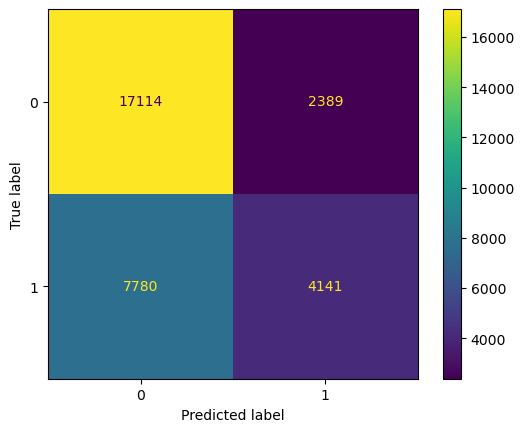

In [395]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_predss, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()

In [181]:
fpr, tpr, thresholds = roc_curve(y_test, y_predss_proba)
roc_aucs = auc(fpr, tpr)

TypeError: 'numpy.float64' object is not callable

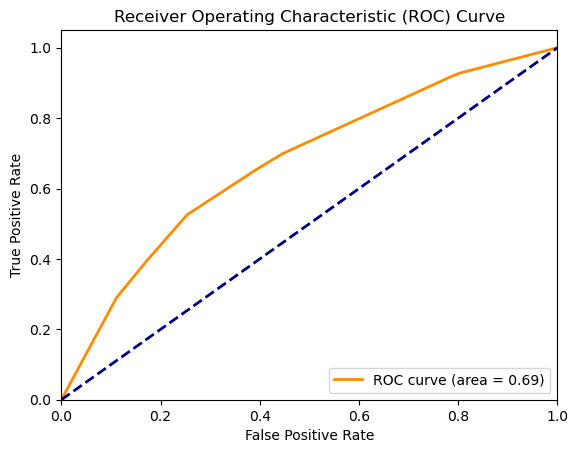

In [396]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_aucs:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [152]:
import pickle

In [153]:
filename = 'finalized_model.sav'
pickle.dump(log_reg, open(filename, 'wb'))

In [403]:
import numpy as np

In [404]:
from collections import Counter

In [405]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier

In [406]:
from sklearn import metrics
from sklearn import tree

In [407]:
import matplotlib

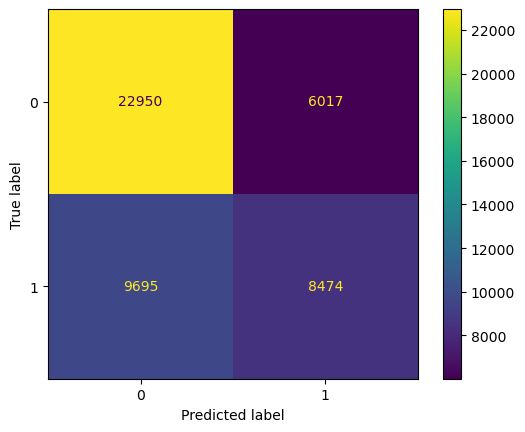

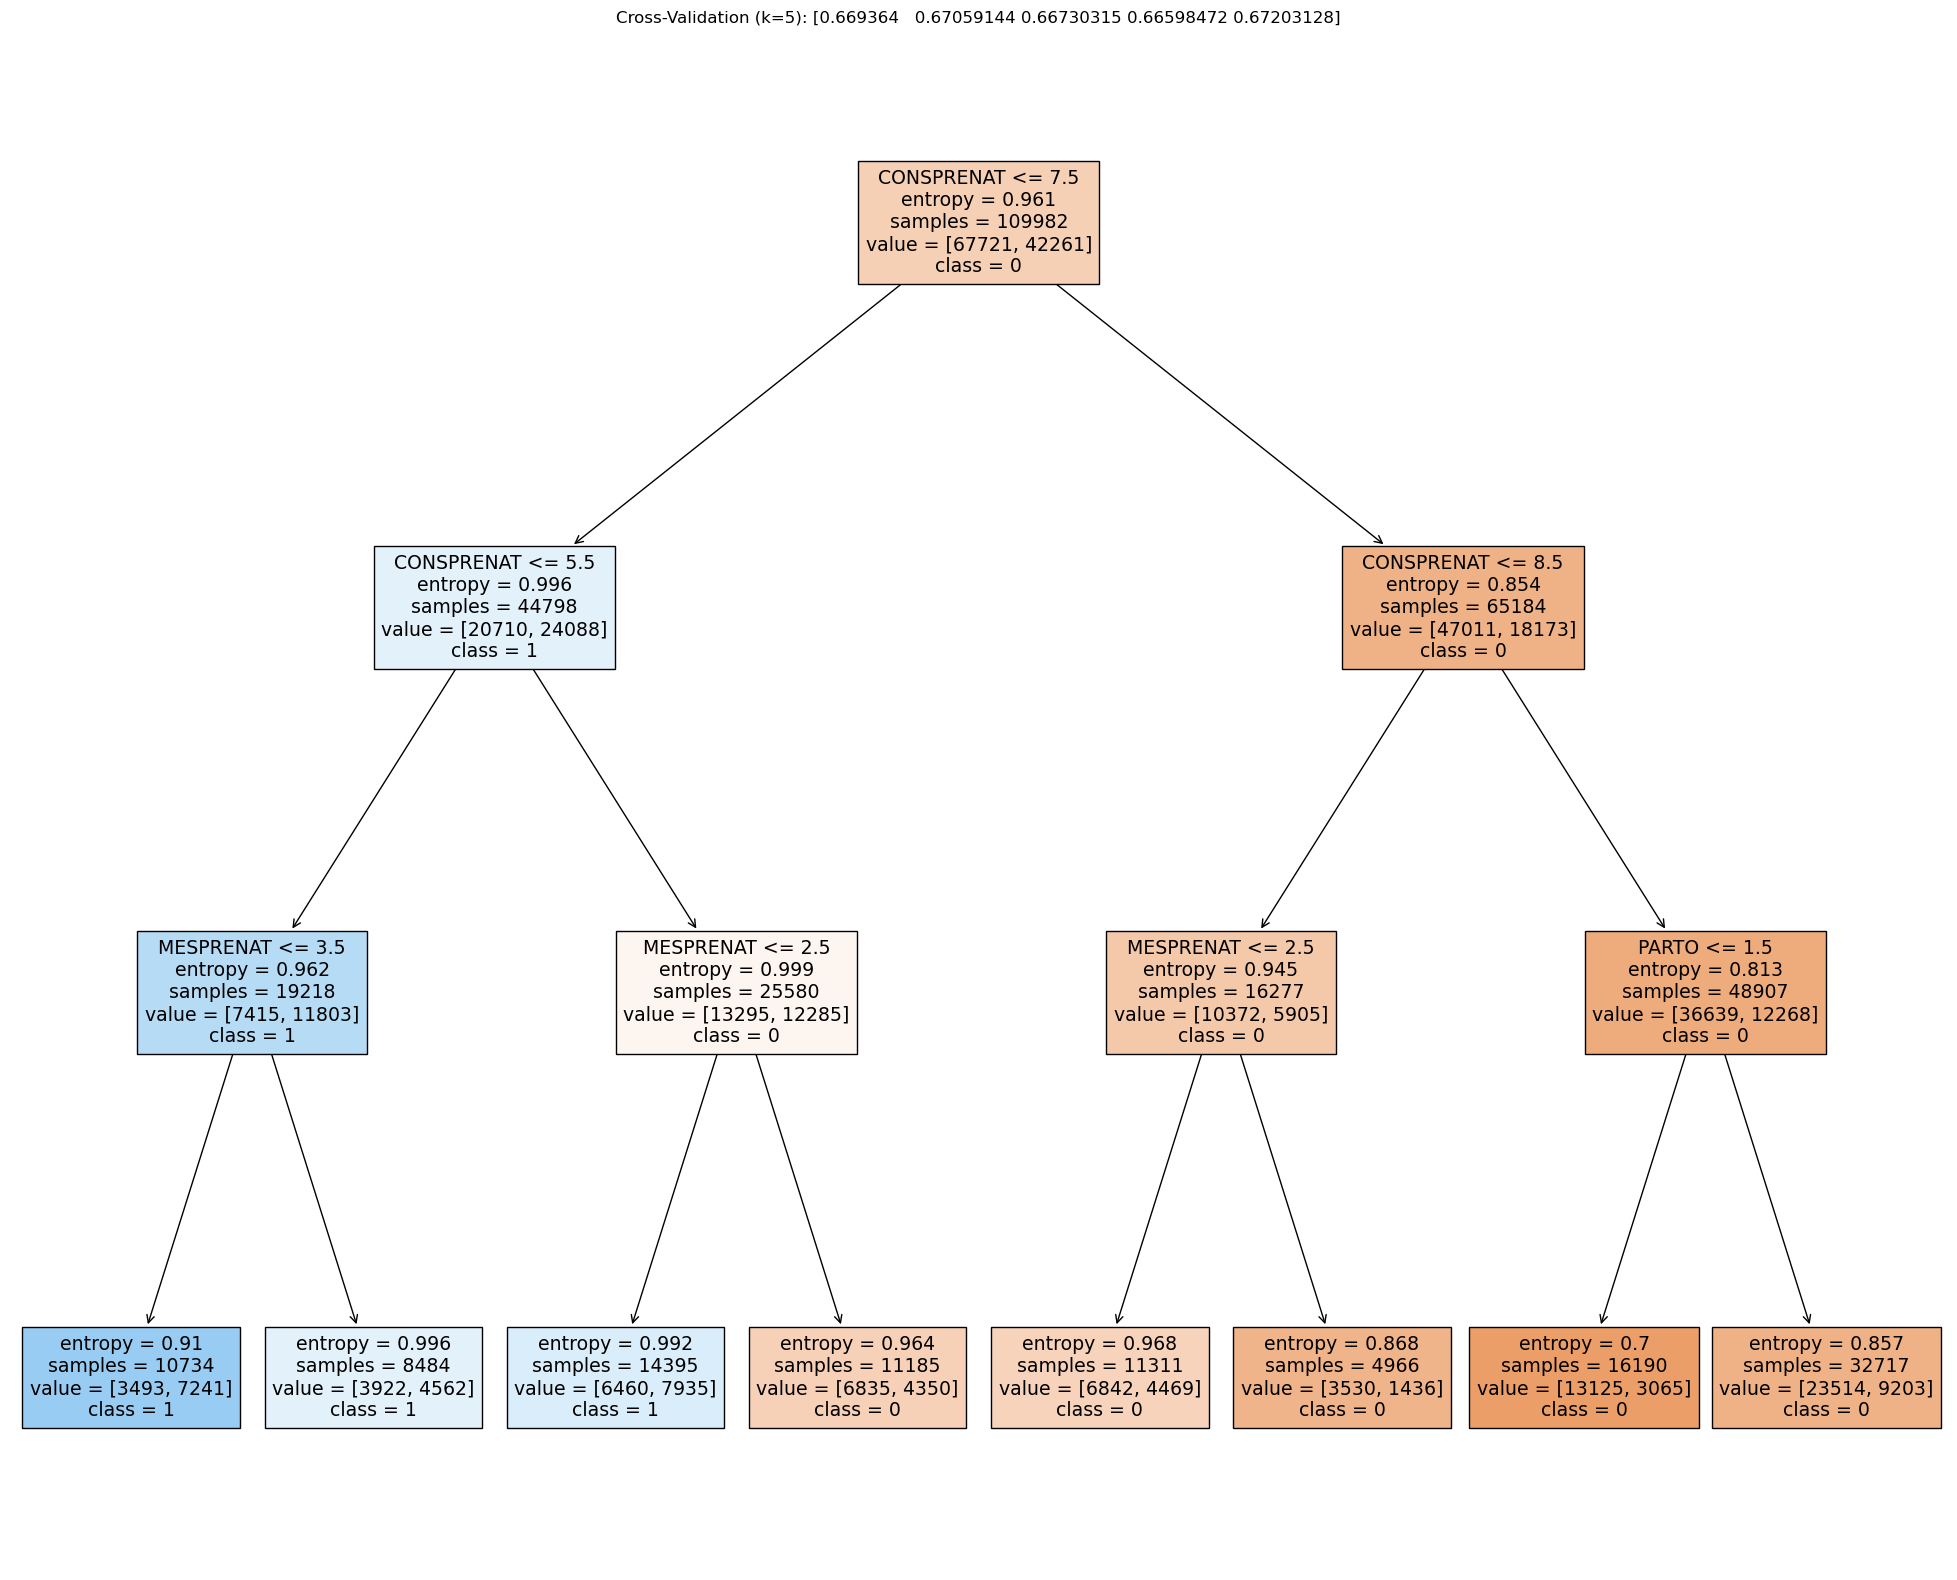

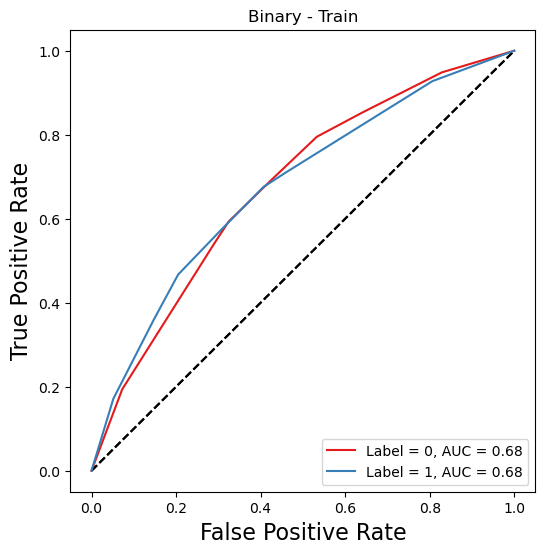

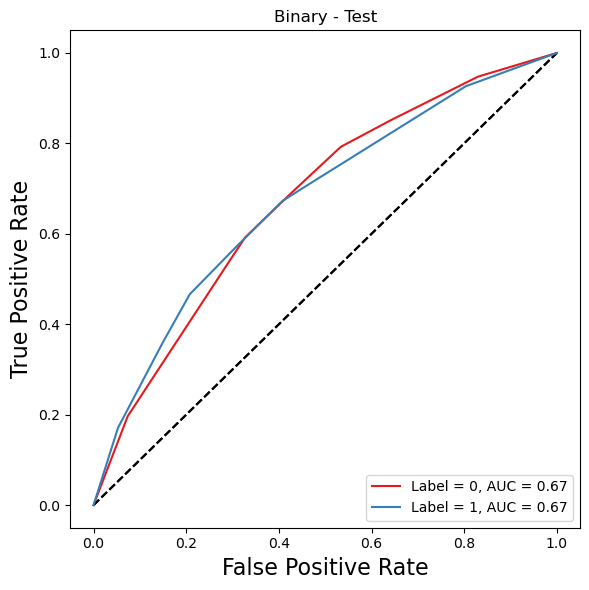

In [408]:
save_fig = False
output_folder = 'output'
rngs = [1] #[1, 2, 3, 4, 5]
train_size = 0.7
max_depths = [3] #[3, 4, 5]
model_types = ['tree'] #['tree', 'forest']
ensemble_types = [False] #[False, 'bagging', 'boosting']
# Columns to remove
columns_to_drop = [
    'GESTACAO',             # Is too strong of a predictor, >twins are tiny
    #'QTDGESTANT_Second',    # Is too strong of a predictor, >twins are tiny
    #'QTDPARTNOR_Second',
    #'CONSULTAS_Second',
    'PESO'
]

# Can only be categorical / integer for regression tree
# Removes labels with low percentage representation (i.e., <10%)
# This is because decision tree clasifiers perform poorly on
# unbalanced datasets since they try to optimize the score for
# each subset simultaneously.
all_values = np.array(list(Counter(y).values()))
all_values = all_values / sum(all_values)
filtered_labels = [] #[l for i,l in enumerate(Counter(y_data).keys()) if all_values[i] > 0.1]
feature_names = [m for m in X.columns.to_list() if m not in columns_to_drop]
# print(X_data.columns)
# print(filtered_labels)
# index_to_drop = [(i,X_data.index[i]) for i,v in enumerate(y_data) if v not in filtered_labels]
# X_data = X_data.drop([i[1] for i in index_to_drop])
# y_data = [y for i,y in enumerate(y_data) if i not in [i[0] for i in index_to_drop]]

# Test multiple random splits for validation
for rng in rngs:
    for max_depth in max_depths:
        for model_type in model_types:
            for ensemble_type in ensemble_types:
                # TODO: guarantee that the RNG selected contains all the labels
                X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=rng)

                if model_type == 'forest':
                    clf = RandomForestClassifier(max_depth=max_depth, criterion='entropy', random_state=rng)
                    # # Interpret the random forest
                    # # `instance` is a random data point to classify
                    # prediction, bias, contributions = treeinterpreter.predict(clf, instance)
                    # # print(f'Prediction: {prediction}')
                    # # print(f'Bias (trainset prior): {bias})
                    # print('Feature contributions:')
                    # for c,feature in zip(contributions[0], iris.feature_names):
                    #     print feature, c
                elif model_type == 'tree':
                    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=rng)
                    if ensemble_type:
                        if ensemble_type == 'bagging':
                            clf = BaggingClassifier(base_estimator=clf, random_state=rng)
                        elif ensemble_type == 'boosting':
                            clf = AdaBoostClassifier(base_estimator=clf, random_state=rng)
                model = clf.fit(X_train, y_train)
                # Perform cross-validation
                cross_val = cross_val_score(clf, X_train, y_train, cv=5)
                # Get the confusion matrix
                predictions = clf.predict(X_test)
                cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
                disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
                disp.plot()
                output_file_name = f'Binary___DTC-confusion-split{int(100*train_size)}-RNG{rng}-maxdepth{max_depth}'
                if model_type == 'tree':
                    if ensemble_type:
                        output_file_name += f'-{ensemble_type}'
                elif model_type == 'forest':
                    output_file_name += '-randomforest'
                if save_fig:
                    plt.savefig(os.path.join(output_folder, output_file_name))
                plt.show()

                if not ensemble_type and (model_type == 'tree'):
                    fig = plt.figure(figsize=(25,20))
                    _ = tree.plot_tree(clf, feature_names=feature_names,  class_names=[str(c) for c in sorted(set(y_train))], filled=True)
                    plt.title(f'Cross-Validation (k=5): {cross_val}')
                    output_file_name = f'Binary___DTC-RNG{rng}'
                    if save_fig:
                        plt.savefig(os.path.join(output_folder, output_file_name))
                    plt.show()

                try:
                    fig = plt.figure(figsize=(6,6))
                    cmap = matplotlib.cm.get_cmap('Set1')
                    # Train results
                    y_pred = clf.predict_proba(X_train)
                    class_labels = sorted([int(l) for l in set(y_train)])
                    for i,class_label in enumerate(class_labels):
                        y_pred_proba = y_pred[:,i]
                        y_pred_estimated = [class_labels[a] for a in np.argmax(y_pred, axis=1)]
                        y_train_label = [1 if y==class_label else 0 for y in y_train]
                        fpr,tpr,_ = metrics.roc_curve(y_train_label, y_pred_proba)
                        auc = metrics.roc_auc_score(y_train_label, y_pred_proba)
                        plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), linestyle='--', color='k')
                        plt.plot(fpr, tpr, label=f'Label = {class_label}, AUC = {auc:.2f}', color=cmap.colors[i])
                    plt.xlabel('False Positive Rate', fontsize=16)
                    plt.ylabel('True Positive Rate', fontsize=16)
                    # accuracy = metrics.accuracy_score(y_train, y_pred_estimated)
                    plt.title(f'Binary - Train')
                    plt.legend(loc='lower right')
                    output_file_name = f'Binary___DTC-AUC-train-split{int(100*train_size)}-RNG{rng}-maxdepth{max_depth}'
                    if model_type == 'tree':
                        if ensemble_type:
                            output_file_name += f'-{ensemble_type}'
                    elif model_type == 'forest':
                        output_file_name += '-randomforest'
                    if save_fig:
                        plt.savefig(os.path.join(output_folder, output_file_name))
                    plt.show()

                    # Test results
                    fig = plt.figure(figsize=(6,6))
                    y_pred = clf.predict_proba(X_test)
                    class_labels = sorted([int(l) for l in set(y_test)])
                    for i,class_label in enumerate(class_labels):
                        y_pred_proba = y_pred[:,i]
                        y_pred_estimated = [class_labels[a] for a in np.argmax(y_pred, axis=1)]
                        y_test_label = [1 if y==class_label else 0 for y in y_test]
                        fpr,tpr,_ = metrics.roc_curve(y_test_label, y_pred_proba)
                        auc = metrics.roc_auc_score(y_test_label, y_pred_proba)
                        plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), linestyle='--', color='k')
                        plt.plot(fpr, tpr, label=f'Label = {class_label}, AUC = {auc:.2f}', color=cmap.colors[i])
                    plt.xlabel('False Positive Rate', fontsize=16)
                    plt.ylabel('True Positive Rate', fontsize=16)
                    # accuracy = metrics.accuracy_score(y_test, y_pred_estimated)
                    plt.title(f'Binary - Test')
                    plt.legend(loc='lower right')
                    plt.tight_layout()
                    output_file_name = f'Binary___DTC-AUC-test-split{int(100*train_size)}-RNG{rng}-maxdepth{max_depth}'
                    if model_type == 'tree':
                        if ensemble_type:
                            output_file_name += f'-{ensemble_type}'
                    elif model_type == 'forest':
                        output_file_name += '-randomforest'
                    if save_fig:
                        plt.savefig(os.path.join(output_folder, output_file_name))
                    plt.show()
                except ValueError:
                    # TODO: some are sucky ... skip for now
                    pass